# 나랑 닮은 연예인을 찾아보자

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.	\
    닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.	\
    다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.

3. 다양하고 재미있는 결과 시각화를 시도하였다.\
    matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

In [2]:
import face_recognition
import numpy as np
import PIL

print(face_recognition.__version__)
print(np.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


## 1. 사진 모으기

file_list: ['차승원.jpg', '이희준.jpg', '장원준.jpeg', '러블리즈예인.jpg', '박정민.jpg', 'biden.jpg', '정형돈.jpg', '이말년.png', '목진화.png', '이대호.jpeg', '이승철.jpeg', '공효진.jpg', '박성호.jpg', '블랙핑크제니.jpg', '지수.jpg', '정민철.jpg', '다니엘 크레이그.jpeg', '트와이스다현.jpeg', '최양락.jpg', '유리.jpg', '개리.jpg', '권태원.jpeg', '김경진.png', '노무현.jpeg', '노홍철.jpeg', '문재인.jpeg', '서장훈.jpg', '크리스 햄스워스.jpg', '레인보우재경.jpg', '이경규.jpeg', '김희철.jpg', '한기범.jpg', '유해진.jpg', '유노윤호.jpg', '장도연.jpg', '내사진4.jpg', '배성재.jpg', '뷔.png', '카이.jpg', '클린트 이스트우드.jpg', '백현.jpg', '김영삼.jpeg', '하정우.jpg', '김학범.jpg', '하승진.jpg', '차두리.jpeg', '트와이스쯔위.jpg', '조이현.jpg', '서현진.png', '전소미.jpg', '대도서관.jpeg', '딕헌터.jpeg', '로제.jpg', '박해일.jpeg', '잭 니콜슨.jpeg', '아이린.jpeg', '줄리엔강.png', '장혁.jpg', '트와이스모모.jpeg', '이영지.jpg', '세훈.jpg', '슬기.jpg', '잇섭.png', '솔라.jpg', '슬리피.jpg', '장나라.png', '곽도원.jpg', '화사.jpg', '트와이스미나.jpg', '이영하.jpg', '무라니시.png', '이명박.jpg', '제이홉.jpg', '벤틀리.jpg', '이준혁.jpeg', '안효섭.jpg', '잭 갤리퍼내키스.jpg', '윤종신.jpeg', '조원희.jpg', '아놀드 슈워제네거.jpg', '내사진1.jpg', '야마다 타카유키.jpeg', '정호연.jpg', '이성민.

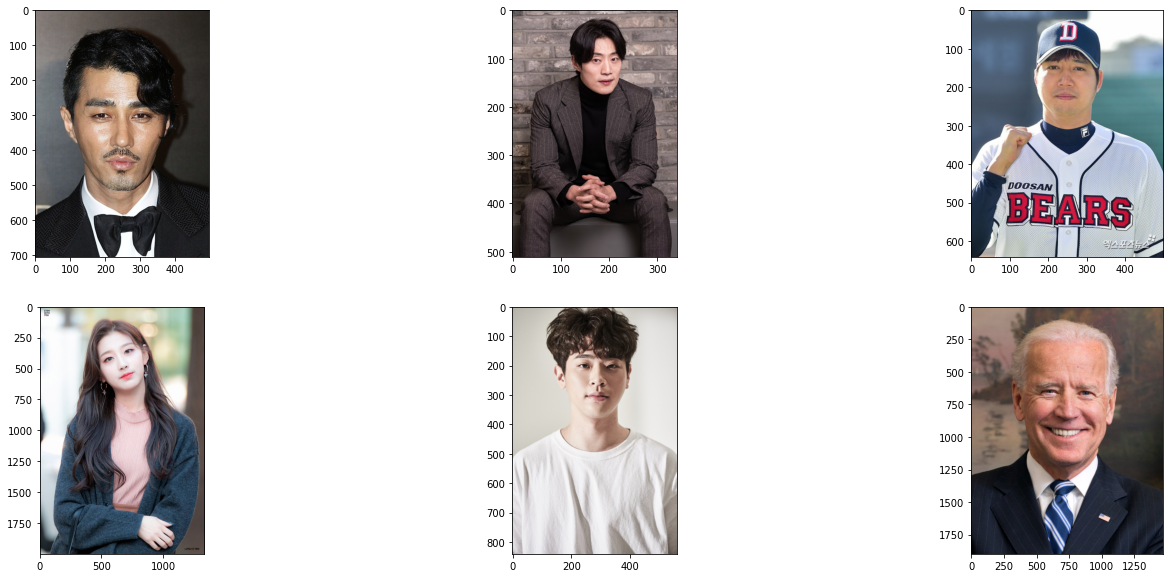

In [3]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2. 얼굴 영역 자르기

[(405, 1362, 1363, 404)]


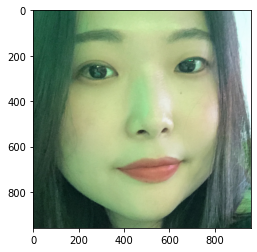

In [4]:
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/내사진3.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [5]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]

    return cropped_face

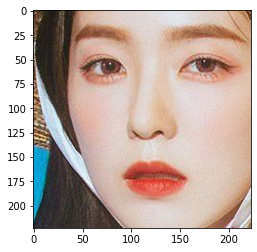

In [6]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/아이린.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [7]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['차승원.jpg', '이희준.jpg', '장원준.jpeg', '러블리즈예인.jpg', '박정민.jpg', 'biden.jpg', '정형돈.jpg', '이말년.png', '목진화.png', '이대호.jpeg', '이승철.jpeg', '공효진.jpg', '박성호.jpg', '블랙핑크제니.jpg', '지수.jpg', '정민철.jpg', '다니엘 크레이그.jpeg', '트와이스다현.jpeg', '최양락.jpg', '유리.jpg', '개리.jpg', '권태원.jpeg', '김경진.png', '노무현.jpeg', '노홍철.jpeg', '문재인.jpeg', '서장훈.jpg', '크리스 햄스워스.jpg', '레인보우재경.jpg', '이경규.jpeg', '김희철.jpg', '한기범.jpg', '유해진.jpg', '유노윤호.jpg', '장도연.jpg', '내사진4.jpg', '배성재.jpg', '뷔.png', '카이.jpg', '클린트 이스트우드.jpg', '백현.jpg', '김영삼.jpeg', '하정우.jpg', '김학범.jpg', '하승진.jpg', '차두리.jpeg', '트와이스쯔위.jpg', '조이현.jpg', '서현진.png', '전소미.jpg', '대도서관.jpeg', '딕헌터.jpeg', '로제.jpg', '박해일.jpeg', '잭 니콜슨.jpeg', '아이린.jpeg', '줄리엔강.png', '장혁.jpg', '트와이스모모.jpeg', '이영지.jpg', '세훈.jpg', '슬기.jpg', '잇섭.png', '솔라.jpg', '슬리피.jpg', '장나라.png', '곽도원.jpg', '화사.jpg', '트와이스미나.jpg', '이영하.jpg', '무라니시.png', '이명박.jpg', '제이홉.jpg', '벤틀리.jpg', '이준혁.jpeg', '안효섭.jpg', '잭 갤리퍼내키스.jpg', '윤종신.jpeg', '조원희.jpg', '아놀드 슈워제네거.jpg', '내사진1.jpg', '야마다 타카유키.jpeg', '정호연.jpg', '이성민.

## 3 얼굴 영역의 임베딩 추출하기

In [8]:
image_file = os.path.join(dir_path, '아이린.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08805867,  0.11986135,  0.07976399, -0.08441514, -0.0758192 ,
        -0.00410643, -0.0620653 , -0.09386791,  0.13264799, -0.19538425,
         0.19163299, -0.09040625, -0.2330842 ,  0.01030738, -0.04114952,
         0.22866622, -0.15706864, -0.16562484, -0.0442335 ,  0.03853063,
         0.10554214,  0.08185939, -0.08126771,  0.02924508, -0.05179145,
        -0.29933929, -0.11778935, -0.00514889, -0.022684  , -0.08885596,
        -0.06366619,  0.01477497, -0.12732488,  0.00822144,  0.00332523,
         0.12562081,  0.0049771 , -0.1260664 ,  0.14475353,  0.03182003,
        -0.30926046,  0.12361823,  0.0839017 ,  0.27664787,  0.15847045,
        -0.0313253 , -0.04792144, -0.15168232,  0.09397148, -0.17421776,
         0.00539682,  0.11223388,  0.04115358,  0.07023486,  0.05250947,
        -0.11838657,  0.05840398,  0.07327914, -0.17471024, -0.01896054,
         0.14943653, -0.10198733,  0.04562671, -0.11519834,  0.17019431,
         0.06025903, -0.07023123, -0.24303067,  0.1

여러분들의 images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 하나 만들어 봅시다.

In [9]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [11]:
# get_face_embedding_dict() 함수가 잘 만들어졌는지 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['손흥민']

IndexError: list index out of range

얼굴 임베딩 사이 거리측정

In [28]:
# 인자로 파일명의 사람 이름 2개를 받아, 두 사람의 얼굴 임베딩 사이의 거리(L2)를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('내사진3', '내사진2')

NameError: name 'np' is not defined

In [ ]:
#L1, L2 디스턴스 참고

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

- def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
- def get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

우리가 만들고 싶은 함수는 다음과 같이 쓸 수 있기를 바랍니다. name 인자에 특정 사람 이름을 주면 그 사람과 가장 닮은 다른 이미지와 거리 정보를 가장 가까운 순으로 정렬해서 표시해 주어야 합니다.

수행결과

순위 1 : 이름(biden), 거리(0.682061661275583)\
순위 2 : 이름(clinton), 거리(0.6875851008652103)\
순위 3 : ... (이하생략)

## 4. 연예인들과 비교하기

In [ ]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('trump')

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [ ]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [ ]:
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [ ]:
# 나와 가장 닮은 사람은 누굴까?
get_nearest_face('obama')

## 5. 다양한 재미있는 시각화 시도해보기

## 회고

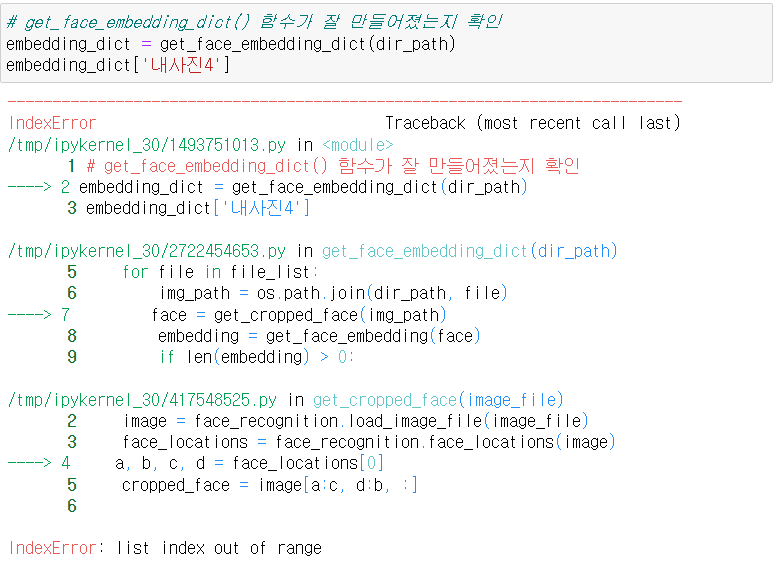
- 이번 프로젝트에서 모두를 괴롭힌 에러다. 사진을 인식하지 못해서 생기는 에러였는데, 사진을 여러번 찍어서 해결되는 경우가 있는가 하면, 사진의 사이즈를 줄여서 해결되는 경우도 있었다.


## Referece